In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
dataset_pth = '../data/dataset/dataset.json'

In [3]:
def read_json(path):
    with open(path, 'r') as file:
        return json.load(file)

In [4]:
dataset = pd.read_json(dataset_pth)

In [5]:
choosen_feat = ['username', 'is_name_social_political', 'desc',
               'tweets', 'n_tweet', 'quoted_tweets', 'n_tweet_use_hashtag',
               'ratio_tweets_use_hashtag', 'n_photo', 'n_video', 'buzzer']
dataset = dataset[choosen_feat]

In [6]:
dataset.sample(2)

,username,is_name_social_political,desc,tweets,n_tweet,quoted_tweets,n_tweet_use_hashtag,ratio_tweets_use_hashtag,n_photo,n_video,buzzer
1054,AbdulMu20301125,0,mesti menjaga eksistensimu singa sdngkan kambi...,[partai sesuci apapun sistem iblis malaikatpun...,6,[gerindra segenap personal kader berubah publi...,0,0.0,0.0,2.0,0
3192,keziafredericaa,0,kerjaannya ngehaluu tr00zzz,"[cinta memiliki memiliki, sih biar overthinkin...",2,[],0,0.0,0.0,0.0,0


## Check features correlation

In [7]:
corr_feat = ['is_name_social_political', 'n_tweet', 'n_tweet_use_hashtag',
             'ratio_tweets_use_hashtag', 'n_photo', 'n_video', 'buzzer']

df = dataset[corr_feat]

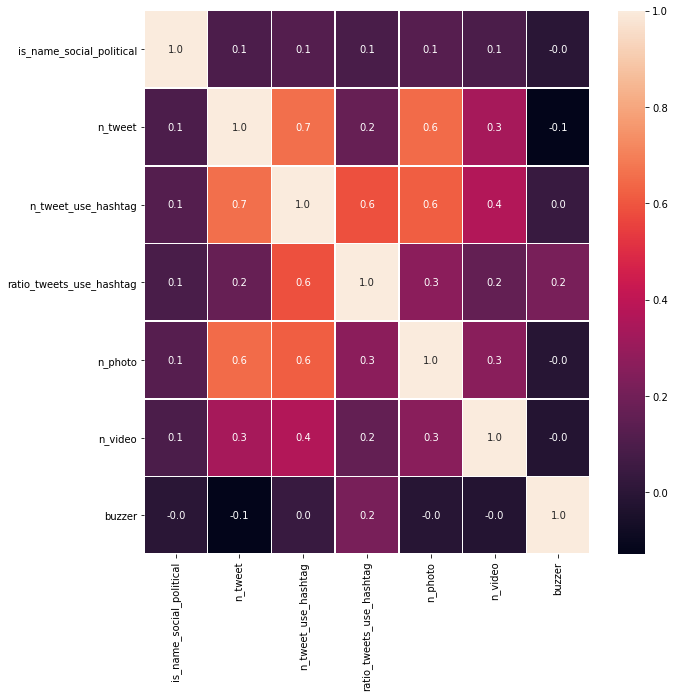

In [8]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

## Text Preprocessing

In [9]:
def text_cleaning(list_text):
    out = [re.sub(r'\b\d+\b', ' ', text) for text in list_text]
    out = [re.sub(r'\s\s+', ' ', text) for text in out]
    return out

In [10]:
dataset['combine_tweet'] = dataset.tweets + dataset.quoted_tweets
dataset['clean_text'] = dataset.combine_tweet.apply(text_cleaning)
dataset['text_used'] = dataset.clean_text.apply(lambda x: " ".join(x))

In [11]:
# Remove empty tweets (NaN)
dataset = dataset[dataset.tweets.str.len() != 0]

In [12]:
dataset.drop(['combine_tweet', 'clean_text'], axis=1, inplace=True)

## Save RAW Dataset

In [13]:
X = dataset
y = dataset['buzzer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
pth = '../data/dataset/'
X_train.to_csv(pth+'RAW_X_train.csv', na_rep=None, index=False)
X_test.to_csv(pth+'RAW_X_test.csv', na_rep=None, index=False)
y_train.to_csv(pth+'RAW_y_train.csv', na_rep=None, index=False)
y_test.to_csv(pth+'RAW_y_test.csv', na_rep=None, index=False)

<AxesSubplot:ylabel='buzzer'>

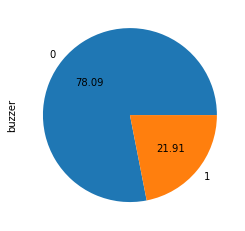

In [15]:
# Check imbalance dataset
y.value_counts().plot.pie(autopct='%.2f')